# Yun Cheng
* HW 02
* USC ID: 5013-2324-78


## Problem 1
**b(i)How many rows are in this data set? How many columns? What do the rows and columns represent?**

In [1]:
import pandas as pd
data = pd.read_excel('./CCPP/Folds5x2_pp.xlsx','Sheet1')
print('The data has',data.shape[0],'rows and',data.shape[1],'columns.')
print('The rows represent data points collected from a Combined Cycle Power Plant over 6 years \
and the columns represent hourly average ambient variables Temperature (T), Ambient Pressure (AP), \
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.')
data.columns=['average ambient Temperature (AT)','Exhaust Vacuum (V)','Ambient Pressure (AP)','Relative Humidity (RH)', ' energy output (EP)']

The data has 9568 rows and 5 columns.
The rows represent data points collected from a Combined Cycle Power Plant over 6 years and the columns represent hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.


**b(i)Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe yourfindings**

In [2]:
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
g=sns.pairplot(data,diag_kind="kde",diag_kws={"linewidth": 0, "shade": False})
def correlation(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
g.map_lower(correlation) 

**Mean Ambient Temperature VS. Energy Output** and **Exhaust Vacuum VS. Engery Output** have strong negative correlation with Energy output.<br>
**Average Ambient Temperature VS.Exhaust Vacuum**  has strong postive correlation')

**b(iii) What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table**

In [3]:
import numpy as np
d = pd.DataFrame({'Mean': data.mean(), 'Median': data.median(),\
                  "Range": list(zip(data.min().get_values(), data.max().get_values())),\
                  "First Quartiles": data.quantile(.25),\
                 "Third Quartiles": data.quantile(.75),
    "Interquartile Range": data.quantile(.75) - data.quantile(.25)})
d

,Mean,Median,Range,First Quartiles,Third Quartiles,Interquartile Range
average ambient Temperature (AT),19.651231,20.345,"(1.81, 37.11)",13.5100,25.72,12.2100
Exhaust Vacuum (V),54.305804,52.080,"(25.36, 81.56)",41.7400,66.54,24.8000
Ambient Pressure (AP),1013.259078,1012.940,"(992.89, 1033.3)",1009.1000,1017.26,8.1600
Relative Humidity (RH),73.308978,74.975,"(25.56, 100.16)",63.3275,84.83,21.5025
energy output (EP),454.365009,451.550,"(420.26, 495.76)",439.7500,468.43,28.6800


**c. For each predictor, fit a simple linear regression model to predict the response.
Describe your results.**
    

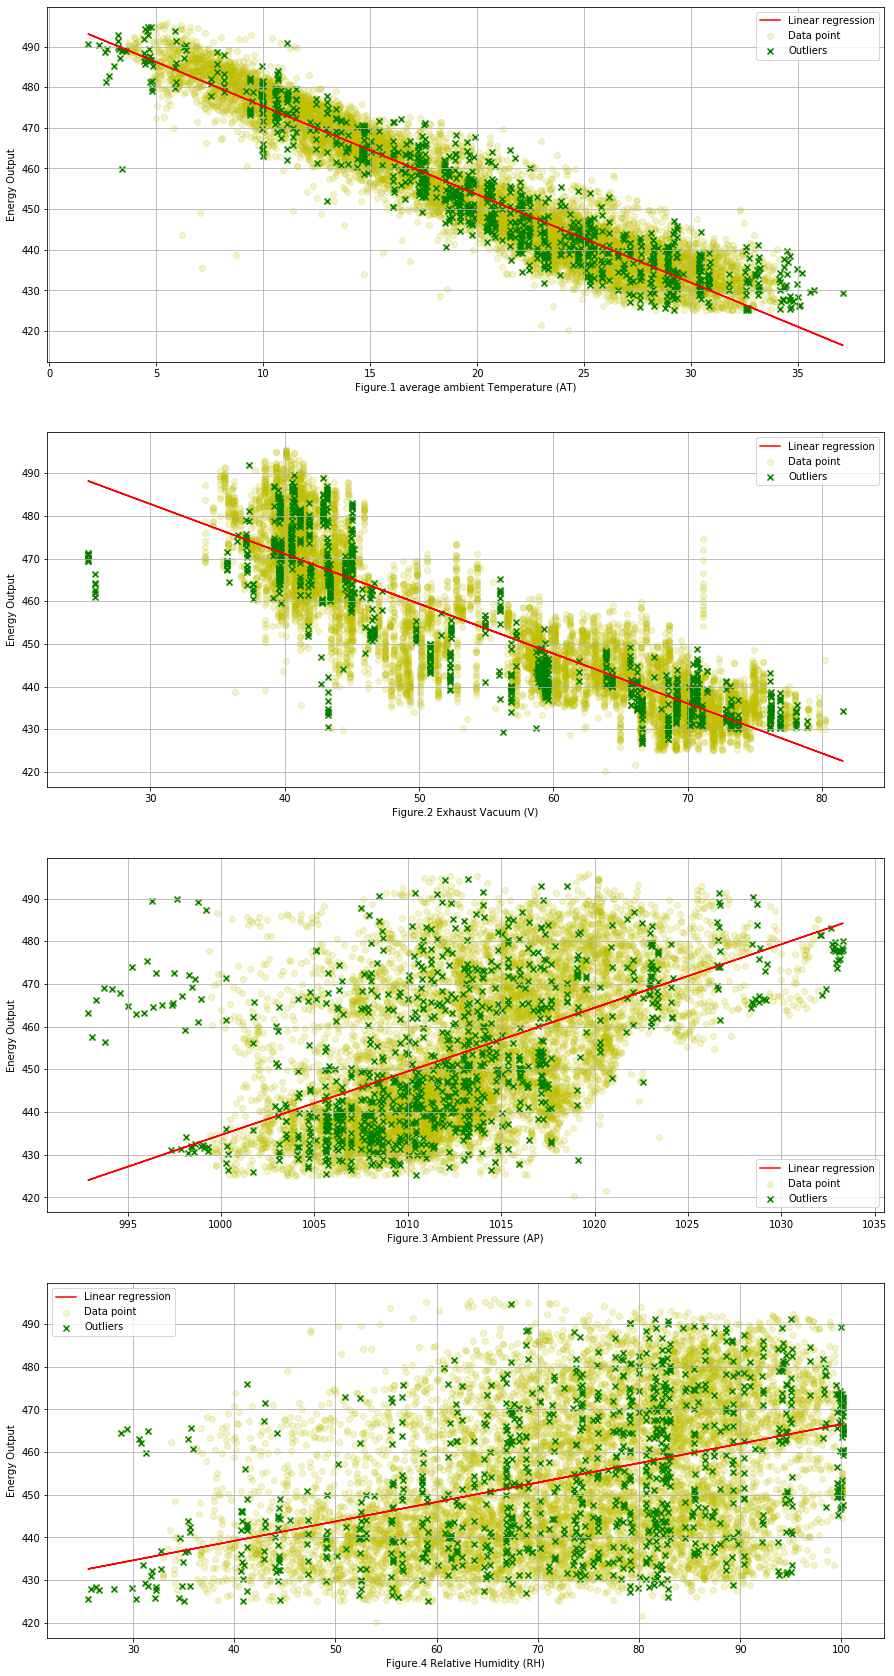

In [4]:
from sklearn.linear_model import LinearRegression
import sklearn
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 30))
R_square_list=[]
labels=['average ambient Temperature (AT)','Exhaust Vacuum (V)','Ambient Pressure (AP)','Relative Humidity (RH)']
Intercept=[]
Coef=[]
yhat=[]
from sklearn.neighbors import LocalOutlierFactor

for i in range(4):
    X =np.array(data.iloc[:,i]).reshape(-1,1)
    Y = np.array(data.iloc[:,-1])
    reg = LinearRegression().fit(X, Y)
    Y_Predict = reg.predict(X)
    
    R_square_list.append(reg.score(X, Y))
    Intercept.append(reg.intercept_)
    Coef.append(reg.coef_)
    lof = LocalOutlierFactor(n_neighbors=30,contamination=0.1)
    y_pred = lof.fit_predict(X)
    lofs_index = np.where(y_pred==-1)
    values = X[lofs_index]
    ax[i].scatter(X, Y, color='y', alpha=0.2)
    ax[i].plot(X, Y_Predict, color='r', alpha=1)
    ax[i].set_ylabel("Energy Output")
    ax[i].scatter(values,Y[lofs_index], color='g',marker='x')
    ax[i].set_xlabel("Figure.{} {}".format(i + 1, labels[i]))
    ax[i].grid(True)
    ax[i].legend(['Linear regression','Data point','Outliers'])
   

**In which of the models is there a statistically significant association between the predictor and the response?**

The temperature and vaccum have siginificant relationship with energy output(Figure 1 and 2).

**Are there any outliers that you would like to remove from your data for each of these regression tasks?**

The outliers were calculated by *Local Outlier Factor* based on a concept of a local density, where locality is given by k nearest neighbors. Outliers were shown in green "x" in the above graphs.
Taking figure 3 as an example, when Pressure is around 995, the data point are pretty deviated from the trendline. 

**(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis H0:βj = 0**

In [5]:
# with statsmodels
import statsmodels.api as sm
X_s=data[['average ambient Temperature (AT)','Exhaust Vacuum (V)','Ambient Pressure (AP)','Relative Humidity (RH)']]
Y_s=data[' energy output (EP)']
X_s = sm.add_constant(X_s) # adding a constant
 
model = sm.OLS(Y_s, X_s).fit()
predictions = model.predict(X_s) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:      energy output (EP)   R-squared:                       0.929
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                 3.114e+04
Date:                 Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                         15:48:46   Log-Likelihood:                -28088.
No. Observations:                 9568   AIC:                         5.619e+04
Df Residuals:                     9563   BIC:                         5.622e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

/Users/caroline/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


All the predictor are correlated

**(e) How do your results from single regression compare to your results from mutivariable regression? 
Create a plot displaying the univariate regression coefficients on the x-axis, and the multiple regression coefficients from on the y-axis.**

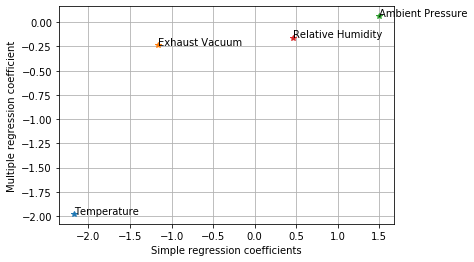

In [6]:
# Covert Simple regression Coefficiant to list
Simple_Coef=[]
for i in Coef:
    i=float(i)
    Simple_Coef.append(i)
Mutip_result=[]
for i in model.params:
    Mutip_result.append(i)
Mutip_Coef=Mutip_result[1:]
labels = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
for i in range(4):
    plt.plot(Simple_Coef[i],Mutip_Coef[i],"*")
    plt.annotate(labels[i],xy=[Simple_Coef[i],Mutip_Coef[i]] )
plt.xlabel("Simple regression coefficients")
plt.ylabel("Multiple regression coefficient")
plt.grid(True)

The Mutiple regression coefficients are always smaller than single regression.

**(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of nonlinear**


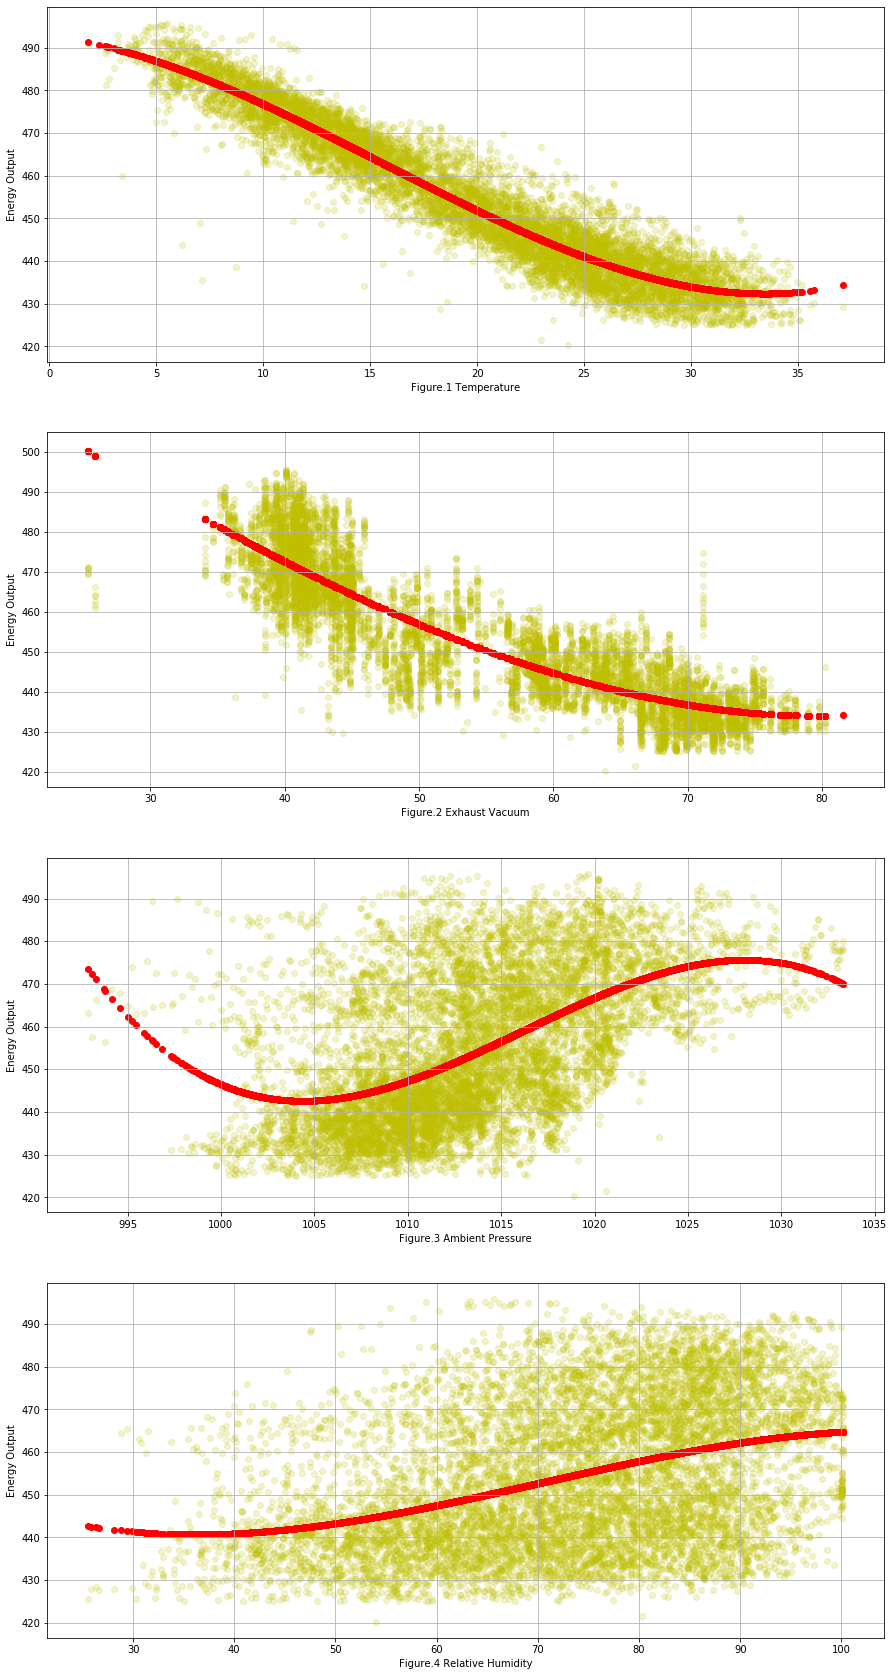

In [7]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 3) 
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,30))
for i in range(4):
    X =np.array(data.iloc[:,i]).reshape(-1,1)
    Y = np.array(data.iloc[:,-1])
    X_poly = poly.fit_transform(X) 
    poly_fit=poly.fit(X_poly, Y) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, Y)
    Y_Poly_Predict = lin2.predict(poly.fit_transform(X))
    ax[i].scatter(X, Y, color='y', alpha=0.2)
    ax[i].scatter(X, Y_Poly_Predict, color='r',alpha=1)
    ax[i].set_ylabel("Energy Output")
    ax[i].set_xlabel("Figure.{} {}".format(i + 1, labels[i]))
    ax[i].grid(True)

For figure 1, somewhat polynomial fit is good. There is no crucial proofs among other figures to support non-linear regression.

**(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant**

In [8]:
import statsmodels.formula.api as smf
df = pd.read_excel('./CCPP/Folds5x2_pp.xlsx')
model_interaction = smf.ols(formula='PE ~ AT*V',data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,530.5331,0.753,704.391,0.000,529.057,532.010
AT,-2.8781,0.036,-80.603,0.000,-2.948,-2.808
V,-0.8632,0.017,-50.904,0.000,-0.896,-0.830
AT:V,0.0238,0.001,34.882,0.000,0.022,0.025


In [9]:
model_interaction = smf.ols(formula='PE ~ AT*AP',data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,335.5473,25.160,13.336,0.000,286.228,384.867
AT,-1.2681,1.328,-0.955,0.340,-3.872,1.336
AP,0.1582,0.025,6.384,0.000,0.110,0.207
AT:AP,-0.0008,0.001,-0.636,0.525,-0.003,0.002


In [10]:
model_interaction = smf.ols(formula='PE ~ AT*RH',data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,500.3388,0.848,589.850,0.000,498.676,502.002
AT,-1.6671,0.035,-48.201,0.000,-1.735,-1.599
RH,0.0046,0.011,0.437,0.662,-0.016,0.025
AT:RH,-0.0098,0.000,-21.455,0.000,-0.011,-0.009


In [11]:
model_interaction = smf.ols(formula='PE ~ V*AP',data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-561.9188,61.448,-9.145,0.000,-682.371,-441.467
V,9.3050,1.196,7.783,0.000,6.961,11.649
AP,1.0604,0.061,17.480,0.000,0.942,1.179
V:AP,-0.0102,0.001,-8.671,0.000,-0.013,-0.008


In [12]:
model_interaction = smf.ols(formula='PE ~ V*RH',data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,477.7017,2.065,231.279,0.000,473.653,481.750
V,-0.6555,0.035,-18.588,0.000,-0.725,-0.586
RH,0.4999,0.027,18.598,0.000,0.447,0.553
V:RH,-0.0062,0.000,-13.229,0.000,-0.007,-0.005


In [13]:
model_interaction = smf.ols(formula='PE ~ AP*RH',data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1391.0493,132.158,-10.526,0.000,-1650.107,-1131.992
AP,1.7927,0.131,13.732,0.000,1.537,2.049
RH,5.7613,1.720,3.350,0.001,2.390,9.132
AP:RH,-0.0053,0.002,-3.118,0.002,-0.009,-0.002


There are 5 important interactions:
AT and V;
AT and RH;
V and AP;
V and RH.


**(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs**

In [14]:
X_data = np.array(data.iloc[:, :-1], dtype=float)
Y_data = np.array(data.iloc[:, data.shape[1] - 1], dtype=float)
Original_labels = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
labels = ['Temperature x Exhaust Vacuum', 'Temperature x Ambient Pressure',\
 'Temperature x Relative Humidity', 'Exhaust Vacuum x Ambient Pressure',\
  'Exhaust Vacuum x Relative Humidity', 'Ambient Pressure x Relative Humidity']
squarelabel=['Temperature^2', 'Exhaust Vacuum^2', 'Ambient Pressure^2', 'Relative Humidity^2']

for i in range(4):
    for j in range(i+1,4):
        new = X_data[:, i].reshape(-1, 1) * X_data[:, j].reshape(-1, 1)
        X_data = np.append(X_data, new, 1)
for k in range(4):
        new = X_data[:, k].reshape(-1, 1) * X_data[:, k].reshape(-1, 1)
        X_data = np.append(X_data, new, axis=1)


In [15]:
newdata=pd.DataFrame(data=X_data,columns=Original_labels+labels+squarelabel)

In [16]:
newdata.head()

,Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Temperature x Exhaust Vacuum,Temperature x Ambient Pressure,Temperature x Relative Humidity,Exhaust Vacuum x Ambient Pressure,Exhaust Vacuum x Relative Humidity,Ambient Pressure x Relative Humidity,Temperature^2,Exhaust Vacuum^2,Ambient Pressure^2,Relative Humidity^2
0,14.96,41.76,1024.07,73.17,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,223.8016,1743.8976,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,634.0324,3963.9616,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,26.1121,1552.3600,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,435.1396,3285.5824,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,117.0724,1406.2500,1.018545e+06,9335.4244


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdata, Y_data, train_size=0.7,random_state=1)

In [18]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.436e+06
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        15:48:50   Log-Likelihood:                         -19209.
No. Observations:                6697   AIC:                                  3.845e+04
Df Residuals:                    6683   BIC:                                  3.854e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Temperature                            -14.1522      3.226     -4.387      0.000     -20.476      -7.828
Exhaust Vacuum                          -2.5040      1.778     -1.409      0.159      -5.989       0.981
Ambient Pressure                         1.0606      0.093     11.416      0.000       0.878       1.243
Relative Humidity                        2.3143      0.971      2.382      0.017       0.410       4.219
Temperature x Exhaust Vacuum             0.0107      0.003      3.369      0.001       0.004       0.017
Temperature x Ambient Pressure           0.0112      0.003      3.575      0.000       0.005       0.017
Temperature x Relative Humidity         -0.0046      0.002     -2.547      0.011      -0.008      -0.001
Exhaust Vacuum x Ambient Pressure        0.0021      0.002      1.185      0.236      -0.001       0.005
Exhaust Vacuum x Relative Humidity       0.0001      0.001      0.170      0.865      -0.001       0.002
Ambient Pressure x Relative Humidity    -0.0021      0.001     -2.199      0.028      -0.004      -0.000
Temperature^2                            0.0194      0.004      5.362      0.000       0.012       0.027
Exhaust Vacuum^2                        -0.0009      0.001     -0.952      0.341      -0.003       0.001
Ambient Pressure^2                      -0.0005   9.04e-05     -6.046      0.000      -0.001      -0.000
Relative Humidity^2                     -0.0018      0.000     -5.647      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1411.833   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12286.885
Skew:                          -0.762   Prob(JB):                         0.00
Kurtosis:                       9.458   Cond. No.                     7.14e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Temperature x Relative Humidity, Exhaust Vacuum x Ambient Pressure, Exhaust Vacuum x Relative Humidity, Ambient Pressure x Relative Humidity, Exhaust Vacuum^2 can be removed

In [19]:
drop_label=["Temperature x Relative Humidity",\
            "Exhaust Vacuum x Ambient Pressure", \
            "Exhaust Vacuum x Relative Humidity", \
            "Ambient Pressure x Relative Humidity", \
            "Exhaust Vacuum^2" ]
Dropdata=newdata.drop(columns=drop_label)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Dropdata, Y_data, train_size=0.7,random_state=1)

In [21]:
linear_regression = LinearRegression().fit(X_train, y_train)
Y__Train_Predict = linear_regression.predict(X_train)
Train_MSE = np.square(np.subtract(y_train,Y__Train_Predict)).mean()
linear_regression_Test=LinearRegression().fit(X_test, y_test)
Y__Test_Predict = linear_regression_Test.predict(X_test)
Y_Test_MSE = np.square(np.subtract(y_test,Y__Test_Predict)).mean()
print('Train MSE is',Train_MSE,",Test MSE is",Y_Test_MSE)

Train MSE is 18.166729679856356 ,Test MSE is 18.232375897667755


**(i) KNN Regression**
* Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k∈ {1,2, . . . ,100} that gives you the best fit. Plot the train and test errors in terms 1/k

In [22]:
X_data = np.array(data.iloc[:, :-1], dtype=float)
Y_data = np.array(data.iloc[:, -1], dtype=float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, train_size=0.7,random_state=1)
from sklearn.preprocessing import Normalizer
import sklearn
X_data_normalize=sklearn.preprocessing.normalize(data)
X_train_normalize, X_test_normalize, y_train_normalize, y_test_normalize = train_test_split(X_data_normalize[:,0:-1], Y_data, train_size=0.7,random_state=1)
alternative_k = np.arange(1,101)


In [23]:
#Raw Train set
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Train_error=[]
for i in alternative_k:
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    Train_error.append(mean_squared_error(y_train,pred_i))
print("Minimum train error:",min(Train_error),"at K =",Train_error.index(min(Train_error))+1)

Minimum train error: 0.0 at K = 1


In [24]:
#Normarlized Train set
Train_error_normalize=[]
for i in alternative_k:
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train_normalize, y_train)
    pred_i = knn.predict(X_train_normalize)
    Train_error_normalize.append(mean_squared_error(y_train,pred_i))

print("Minimum train_normalize error:",min(Train_error_normalize),"at K =",Train_error_normalize.index(min(Train_error_normalize))+1)

Minimum train_normalize error: 0.0 at K = 1


In [25]:
#Raw Test set
Test_error=[]
for i in alternative_k:
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train, y_train_normalize)
    pred_test = knn.predict(X_test)
    Test_error.append(mean_squared_error(y_test,pred_test))

print("Minimum test error:",min(Test_error),"at K =",Test_error.index(min(Test_error))+1)


Minimum test error: 15.704821203761764 at K = 5


In [26]:
#Normarlized Test set
Test_error_normalize=[]
for i in alternative_k:
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train_normalize, y_train_normalize)
    pred_i = knn.predict(X_test_normalize)
    Test_error_normalize.append(mean_squared_error(y_test,pred_i))

print("Minimum Test_normalize error:",min(Test_error_normalize),"at K =",Test_error_normalize.index(min(Test_error_normalize))+1)

Minimum Test_normalize error: 4.546098529354859 at K = 3


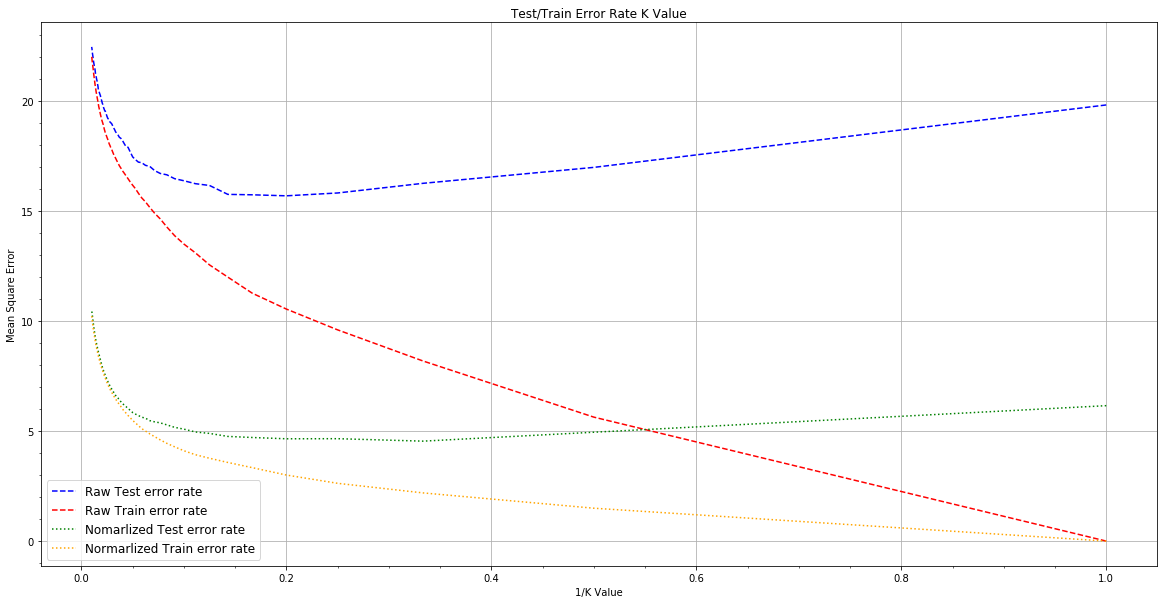

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(1/alternative_k, Test_error, color='blue', linestyle='dashed', \
         label='Raw Test error rate')
plt.plot(1/alternative_k, Train_error, color='red', linestyle='dashed',\
          label='Raw Train error rate')
plt.plot(1/alternative_k, Test_error_normalize, color='green', linestyle='dotted',\
         label='Nomarlized Test error rate')
plt.plot(1/alternative_k, Train_error_normalize, color='orange', linestyle='dotted',\
          label='Normarlized Train error rate')
plt.title('Test/Train Error Rate K Value')
plt.xlabel('1/K Value')
plt.ylabel('Mean Square Error')
plt.grid(True)
plt.minorticks_on()
plt.legend(prop={'size': 12})

**(j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis**

In [28]:
#Linear regression raw train set
Linear_train_error=[]
reg = LinearRegression().fit(X_train, y_train)
Y_Predict = reg.predict(X_train)
Linear_train_error.append(mean_squared_error(y_train,Y_Predict))
print("Linear_train_error:",min(Linear_train_error))

Linear_train_error: 20.766119761450934


In [29]:
#Linear regression normalized train set
Linear_train_normal_error=[]
for i in alternative_k:
    reg = LinearRegression().fit(X_train_normalize, y_train_normalize)
    Y_Predict = reg.predict(X_train_normalize)
    Linear_train_normal_error.append(mean_squared_error(y_train_normalize,Y_Predict))
print("Linear_train_normalize_error:",min(Linear_train_normal_error))

Linear_train_normalize_error: 4.219414878965346


In [30]:
#Linear regression raw test set
Linear_test_error=[]
reg = LinearRegression().fit(X_train, y_train)
Y_Predict = reg.predict(X_test)
Linear_test_error.append(mean_squared_error(y_test,Y_Predict))
print("Linear_test_error:",min(Linear_test_error))

Linear_test_error: 20.77747810688439


In [31]:
#Linear regression normalized test set
Linear_test_normal_error=[]
reg = LinearRegression().fit(X_train_normalize, y_train_normalize)
Y_Predict = reg.predict(X_test_normalize)
Linear_test_normal_error.append(mean_squared_error(y_test_normalize,Y_Predict))
print("Linear_test_normal_error:",min(Linear_test_normal_error))

Linear_test_normal_error: 4.0962879060391915


In [32]:
summary={"Test error":[min(Test_error),min(Linear_test_error)],"Test normalized error":[min(Test_error_normalize),min(Linear_test_normal_error)]}
table=pd.DataFrame(data=summary,index=['KNN','Linear regression'])
table

,Test error,Test normalized error
KNN,15.704821,4.546099
Linear regression,20.777478,4.096288


Among the KNN results, it provides smaller error on the normalized test set. Clearly when using KNN regression, the test is neccessary to be normalized. Among the Linear regression results, it provides smaller error on the normalized test set, therefore, when performing the Linear regression, the data set is neccessary to be normalized as well. Comparing the KNN regression and Linear regression, the KNN regression has better performance in this case.

# Problem ISLR 2.4.1

a) Yes. A flexible method will fit the data closer and with the large sample size 

b) No. It more likely causes overfitting since parameters are large and observation is poor.

c) Yes. With more degrees of freedom, a flexible method would fit better than an inflexible one

d) A flexible method would fit to the noise in the error terms and increase variance.

# Problem ISLR 2.4.7

**a)**<br>
1. sqrt(3^2) = 3 <br>
2. sqrt(2^2) = 2<br>
3. sqrt(1^2 + 3^2) = sqrt(10) = 3.16 4<br>
4. sqrt(1^2 + 2^2) = sqrt(5) = 2.24<br>
5. sqrt(1^2 + 1^2) = sqrt(2) = 1.41<br>
6. sqrt(1^2 + 1^2 + 1^2) = sqrt(3) = 1.73<br>

**b)** When K=1, the nearest neighbor is observation 5, which is green

**c)** When K=3, the nearest neighbor is observation 5,6,2, which is 1/3 green and 2/3 red.

**d)** Small, because the level of flexibility is inversely proportional to the number of K for KNN approach, and to fit non-linear characteristcs is needed a high flexible approach.